In [1]:
import torch, pickle, time, os, random
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sci
import matplotlib as mpl

In [2]:
case='vlarge_all_4t_z2.0_None'

data=pickle.load(open(f'../../../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl', 'rb'))

In [11]:
Mhft=[]
Mst=[]
lst=[]
for d in data[int(len(data)*0.8):]:
    Mhft.append(d.x.numpy()[0,3])
    Mst.append(d.y.numpy())
    lst.append(len(d.x.numpy()))
Mst=np.vstack(Mst)
Mhft=np.array(Mhft)
lst=np.log10(lst)
Mst=np.vstack(Mst)[:,0]+9
Mhf=[]
Ms=[]
ls=[]
for d in data[:int(len(data)*0.8)]:
    Mhf.append(d.x.numpy()[0,3])
    Ms.append(d.y.numpy())
    ls.append(len(d.x.numpy()))
Ms=np.vstack(Ms)
Mhf=np.array(Mhf)
ls=np.log10(ls)
Ms=Ms[:,0]+9

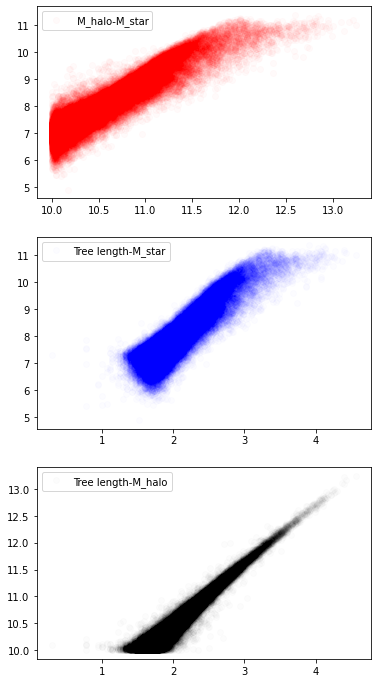

In [12]:
fig , ax = plt.subplots(3, figsize=(6,12))
ax[0].plot(Mhf,Ms, 'ro',label =' M_halo-M_star', alpha=0.02)
ax[1].plot(ls,Ms, 'bo',label = 'Tree length-M_star', alpha=0.01)
ax[2].plot(ls,Mhf, 'ko',label = 'Tree length-M_halo', alpha=0.01)

for a in ax:
    a.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


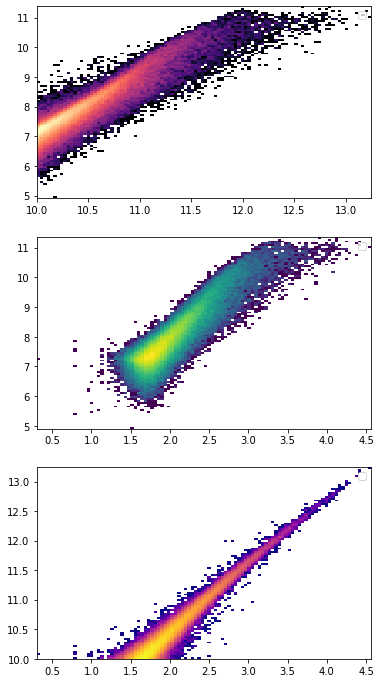

In [13]:
fig , ax = plt.subplots(3, figsize=(6,12))
ax[0].hist2d(Mhf,Ms,label =' M_halo-M_star', bins=100, norm=mpl.colors.LogNorm(), cmap=mpl.cm.magma)
ax[1].hist2d(ls,Ms,label = 'Tree length-M_star',bins=100, norm=mpl.colors.LogNorm(), cmap=mpl.cm.viridis)
ax[2].hist2d(ls, Mhf, label = 'Tree length-M_halo',bins=100, norm=mpl.colors.LogNorm(), cmap=mpl.cm.plasma)

for a in ax:
    a.legend()

## First, halo spline relationship

In [14]:
#trick to make splines work
Mhf+=np.arange(len(Mhf))/1e6
ls+=np.arange(len(Mhf))/1e6

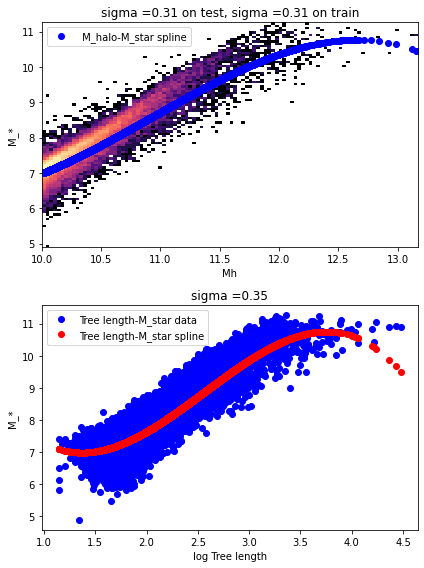

In [15]:
fig , ax = plt.subplots(2, figsize=(6,8))

a=np.array([Mhf,Ms, ls])
a = a[:,a[0,:].argsort()]
Mhf, Ms, ls = a
Mhf+=np.arange(len(Mhf))/1e6
ls+=np.arange(len(Mhf))/1e6

splineMhf=sci.UnivariateSpline(Mhf, Ms)
# ax[0].plot(Mhft,Mst, 'ro',label =' M_halo-M_star data')
ax[0].hist2d(Mhft,Mst,label =' M_halo-M_star', bins=100, norm=mpl.colors.LogNorm(), cmap=mpl.cm.magma)

ax[0].plot(Mhft,splineMhf(Mhft), 'bo',label =' M_halo-M_star spline')
ax[0].set(title=f'sigma ={np.round(np.std(splineMhf(Mhft)-Mst),2)} on test, sigma ={np.round(np.std(splineMhf(Mhf)-Ms),2)} on train', xlabel='Mh', ylabel='M_*')

Mhf-=np.arange(len(Mhf))/1e6
ls-=np.arange(len(Mhf))/1e6

a=np.array([Mhf,Ms, ls])
a = a[:,a[2,:].argsort()]
Mhf, Ms, ls = a
Mhf+=np.arange(len(Mhf))/1e6
ls+=np.arange(len(Mhf))/1e6

splinels=sci.UnivariateSpline(ls, Ms)
ax[1].plot(lst,Mst, 'bo',label = 'Tree length-M_star data')
ax[1].plot(lst,splinels(lst), 'ro',label = 'Tree length-M_star spline')
ax[1].set(title=f'sigma ={np.round(np.std(splinels(ls)-Ms),2)}', xlabel='log Tree length', ylabel='M_*')

for a in ax:
    a.legend()
fig.tight_layout()
Mhf-=np.arange(len(Mhf))/1e6
ls-=np.arange(len(Mhf))/1e6

## Abundance matching

In [16]:
a=np.array([Mhf,Ms, ls])
a = a[:,a[0,:].argsort()]
Mhf, Ms, ls = a

In [17]:
Mhf_am,Ms_am=np.sort([Mhf,Ms], axis=1)
# plt.plot()[0],np.sort([Mhf,Ms])[1])

Text(0.5, 0, 'M_*')

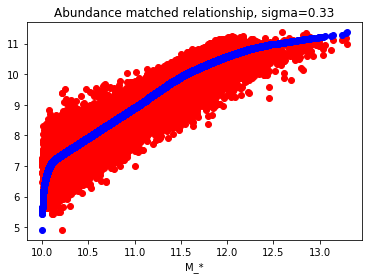

In [18]:
plt.plot(Mhf,Ms,'ro')
plt.plot(Mhf_am,Ms_am,'bo')
plt.title(f'Abundance matched relationship, sigma={np.std(Ms-Ms_am):.2f}')
plt.xlabel('M_halo')
plt.xlabel('M_*')

## Analytic fitting relationship (which one should I use?)
https://iopscience.iop.org/article/10.1088/0004-637X/710/2/903/pdf is an idea